In [159]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
#import tensorflow.keras.layers.BatchNormalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


In [160]:
from tensorflow_history_plot import show_acc


In [161]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combi = [train_data, test_data]


In [162]:
X_train = train_data["Pclass"]
Y_train = train_data["Survived"]

X_test = test_data["Pclass"]
X_train.shape, Y_train.shape, X_test.shape


((891,), (891,), (418,))

In [163]:
train_data = train_data.drop(
    ['Name', 'PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1)
test_data = test_data.drop(
    ['Name', 'PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1)
combi = [train_data, test_data]

train_data.shape, test_data.shape


((891, 4), (418, 3))

In [164]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    train_data[["Pclass", "Sex", "Age"]], train_data["Survived"], test_size=0.2, random_state=42)

X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape


((712, 3), (179, 3), (712,), (179,))

In [165]:
# Map auf numersiche Werte

train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

# fill auf Age
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)

X_train1["Age"].fillna(X_train1["Age"].median(skipna=True), inplace=True)
X_test1["Age"].fillna(X_test1["Age"].median(skipna=True), inplace=True)


X_train1['Sex'] = X_train1['Sex'].map({'female': 1, 'male': 0}).astype(int)
X_test1['Sex'] = X_test1['Sex'].map({'female': 1, 'male': 0}).astype(int)


In [166]:
train_data.head() , test_data.head()

(   Survived  Pclass  Sex   Age
 0         0       3    0  22.0
 1         1       1    1  38.0
 2         1       3    1  26.0
 3         1       1    1  35.0
 4         0       3    0  35.0,
    Pclass  Sex   Age
 0       3    0  34.5
 1       3    1  47.0
 2       2    0  62.0
 3       3    0  27.0
 4       3    1  22.0)

In [167]:
train_data.shape, test_data.shape


((891, 4), (418, 3))

In [168]:
X_train = train_data[["Pclass","Sex","Age"]]
Y_train = train_data["Survived"]


X_test = test_data["Pclass"]

X_train.shape, Y_train.shape, X_test.shape


((891, 3), (891,), (418,))

In [169]:
Y_test = np.asarray(X_test).astype('float32').reshape((-1, 1))
X_test = np.asarray(X_test).astype('float32').reshape((-1, 1))
X_train = np.asarray(X_train).astype('float32').reshape((-1, 3))
Y_train = np.asarray(Y_train).astype('float32').reshape((-1, 1))
X_train.shape, Y_train.shape, X_test.shape

X_train1


,Pclass,Sex,Age
331,1,0,45.5
733,2,0,23.0
382,3,0,32.0
704,3,0,26.0
813,3,1,6.0
...,...,...,...
106,3,1,21.0
270,1,0,28.0
860,3,0,41.0
435,1,1,14.0


In [170]:
X_train1 = np.asarray(X_train1).astype('float32').reshape((-1, 3))
X_test1 = np.asarray(X_test1).astype('float32').reshape((-1, 3))
Y_train1 = np.asarray(Y_train1).astype('float32').reshape((-1, 1))
Y_test1 = np.asarray(Y_test1).astype('float32').reshape((-1, 1))

X_train1.shape, Y_train1.shape, X_test1.shape, Y_test1.shape


((712, 3), (712, 1), (179, 3), (179, 1))

In [175]:

model = Sequential([
    layers.Dense(125, activation='sigmoid',batch_input_shape=(None,3), name="layer1"),
    layers.Dense(500, activation='sigmoid', name="layer2"),
    layers.Dense(750, activation='sigmoid', name="layer3")
])
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

optimize = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=optimize,
              metrics=['accuracy'])


history = model.fit(X_train1, Y_train1, epochs=100, validation_data=(X_test1, Y_test1))
model.evaluate(X_test1, Y_test1, verbose=2)

pred = model.predict(X_test1)


"""

#history = model.fit(X_train, Y_train, epochs=10, verbose=2, validation_data=(X_test1, Y_test1))
history = model.fit(X_train, Y_train, batch_size=890, epochs=10,
                    verbose=2, validation_data=X_test)

"""


Epoch 1/100
23/23 [==============================] - 1s 19ms/step - loss: 0.7532 - accuracy: 0.5646 - val_loss: 0.6761 - val_accuracy: 0.5866
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6918 - accuracy: 0.5815 - val_loss: 0.7525 - val_accuracy: 0.5866
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6749 - accuracy: 0.6067 - val_loss: 0.6857 - val_accuracy: 0.5866
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6694 - accuracy: 0.6348 - val_loss: 0.6676 - val_accuracy: 0.6089
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6567 - accuracy: 0.6306 - val_loss: 0.7275 - val_accuracy: 0.5866
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6723 - accuracy: 0.5969 - val_loss: 0.6592 - val_accuracy: 0.5978
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6609 - accuracy: 0.6390 - val_loss: 0.6964 - val_accuracy: 0.5922
Epoch 

'\n\n#history = model.fit(X_train, Y_train, batch_size=890, epochs=10, verbose=2, validation_data=(X_test1, Y_test1))\nhistory = model.fit(X_train, Y_train, batch_size=890, epochs=10,\n                    verbose=2, validation_data=X_test)\n\n'

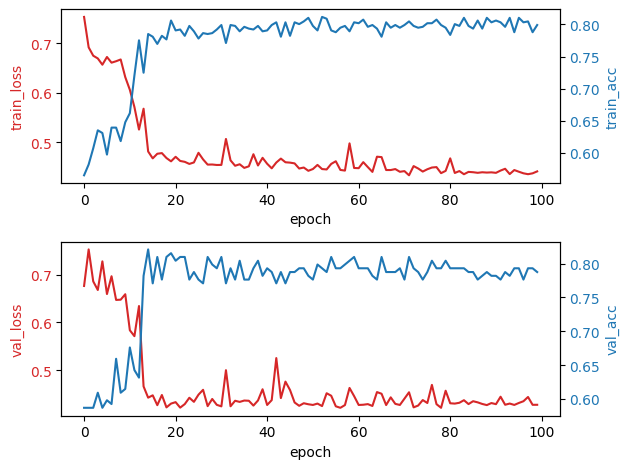

In [176]:

show_acc.plot(history)

In [ ]:
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 500)               2000      
                                                                 
 layer2 (Dense)              (None, 250)               125250    
                                                                 
 layer3 (Dense)              (None, 125)               31375     
                                                                 
 dense_20 (Dense)            (None, 1)                 126       
                                                                 
Total params: 158,751
Trainable params: 158,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)
model.compile(
    optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc'
)
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                                 
 dense_1 (Dense)             (3, 2)                    10        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(
                y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}


In [ ]:
# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=3)


Epoch 1/3
32/32 [==============================] - 0s 1ms/step - loss: 0.2901 - mae: 0.4345
Epoch 2/3
32/32 [==============================] - 0s 2ms/step - loss: 0.2579 - mae: 0.4092
Epoch 3/3
32/32 [==============================] - 0s 979us/step - loss: 0.2472 - mae: 0.4005
